### DSR 20 - Backprop course

## 3. NN and backprop
### Here we are going to implement a Multy Layered Neural Netwrok.
### We will use and extreme case of SGD where the batch size is 1 (i.e updating weights after every sample)

In [4]:
import numpy as np
import matplotlib.pyplot as plt

### multi layer perceptron class:

loss function:
$$ loss = 0.5(pred-true)^{2}$$


In [5]:
class NeuralNetwork:
    def __init__(self, layers, alpha=0.1):
    # initialize the list of weights matrices, then store the
    # network architecture and learning rate
        self.W = []
        self.layers = layers
        self.alpha = alpha
        # start looping from the index of the first layer but
        # stop before we reach the last two layers
        for i in np.arange(0, len(layers) - 2):
            # randomly initialize a weight matrix connecting the
            # number of nodes in each respective layer together,
            # adding an extra node for the bias
            w = np.random.randn(layers[i] + 1, layers[i + 1] + 1)
            self.W.append(w / np.sqrt(layers[i]))
        # the last two layers are a special case where the input
        # connections need a bias term but the output does not
        w = np.random.randn(layers[-2] + 1, layers[-1])
        self.W.append(w / np.sqrt(layers[-2]))
    
    def __repr__(self):
        # construct and return a string that represents the network
        # architecture
        return "NN architecture: {}".format(
        "-".join(str(l) for l in self.layers))
    
    def sigmoid(self, x):
        # compute and return the sigmoid activation value for a
        # given input value
        return 1.0 / (1 + np.exp(-x))
    
    def sigmoid_deriv(self, x):
        # compute the derivative of the sigmoid function ASSUMING
        # that `x` has already been passed through the `sigmoid`
        # function
        return x * (1 - x)
    
    def fit(self, X, y, epochs=1000, displayUpdate=100):
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        X = np.c_[X, np.ones((X.shape[0]))]
        losses = []
        # loop over the desired number of epochs
        for epoch in np.arange(0, epochs):
            # loop over each individual data point and train
            # our network on it
            for (x, target) in zip(X, y):
                self.fit_partial(x, target)
                # check to see if we should display a training update
            if epoch == 0 or (epoch + 1) % displayUpdate == 0:
                loss = self.calculate_loss(X, y)
                print("[Training: ] epoch=", epoch+1, ", loss=",loss)
                losses.append(loss)  
        return losses
                    
    def fit_partial(self, x, y):
        # construct our list of output activations for each layer
        # as our data point flows through the network; the first
        # activation is a special case -- it's just the input
        # feature vector itself
        A = [np.atleast_2d(x)]
        # FEEDFORWARD:
        # loop over the layers in the network
        for layer in np.arange(0, len(self.W)):
            # feedforward the activation at the current layer by
            # taking the dot product between the activation and
            # the weight matrix -- this is called the "net input"
            # to the current layer
            net = A[layer].dot(self.W[layer])
            # computing the "net output" is simply applying our
            # nonlinear activation function to the net input
            out = self.sigmoid(net)
            # once we have the net output, add it to our list of
            # activations
            A.append(out)

        # BACKPROPAGATION
        # the first phase of backpropagation is to compute the
        # difference between our *prediction* (the final output
        # activation in the activations list) and the true target
        # value
        derror = A[-1] - y

        # from here, we need to apply the chain rule and build our
        # list of deltas `D`; the first entry in the deltas is
        # simply the error of the output layer times the derivative
        # of our activation function for the output value
        D = [derror * self.sigmoid_deriv(A[-1])]
        # once you understand the chain rule it becomes super easy
        # to implement with a `for` loop -- simply loop over the
        # layers in reverse order (ignoring the last two since we
        # already have taken them into account)
        for layer in np.arange(len(A) - 2, 0, -1):
            # the delta for the current layer is equal to the delta
            # of the *previous layer* dotted with the weight matrix
            # of the current layer, followed by multiplying the delta
            # by the derivative of the nonlinear activation function
            # for the activations of the current layer
            delta = D[-1].dot(self.W[layer].T)
            delta = delta * self.sigmoid_deriv(A[layer])
            D.append(delta)
        # since we looped over our layers in reverse order we need to
        # reverse the deltas
        D = D[::-1]
        # WEIGHT UPDATE PHASE
        # loop over the layers
        for layer in np.arange(0, len(self.W)):
        # update our weights by taking the dot product of the layer
        # activations with their respective deltas, then multiplying
        # this value by some small learning rate and adding to our
        # weight matrix -- this is where the actual "learning" takes
        # place
            self.W[layer] += -self.alpha * A[layer].T.dot(D[layer])
            
    def predict(self, X,addBias=False):
        # initialize the output prediction as the input features -- this
        # value will be (forward) propagated through the network to
        # obtain the final prediction
        p = np.atleast_2d(X)
        # insert a column of 1's as the last entry in the feature
        # matrix (bias)
        if addBias:
            p = np.c_[p, np.ones((p.shape[0]))]
        # loop over our layers in the network
        for layer in np.arange(0, len(self.W)):
            # computing the output prediction is simply
            # the forward pass
            
            p = self.sigmoid(np.dot(p, self.W[layer]))
        return p
    
    def calculate_loss(self, X, targets):
        # make predictions for the input data points then compute
        # the loss
        targets = np.atleast_2d(targets)
        predictions = self.predict(X)
        loss = 0.5 * np.sum((predictions - targets) ** 2)
        return loss

In [3]:
# construct the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# define our 2-2-1 neural network and train it
nn = NeuralNetwork([2, 2,1], alpha=0.5)
losses = nn.fit(X, y, epochs=10000)

[Training: ] epoch= 1 , loss= 0.5109911323478593
[Training: ] epoch= 100 , loss= 0.4995021792411183
[Training: ] epoch= 200 , loss= 0.4980378301024002
[Training: ] epoch= 300 , loss= 0.49228876344203376
[Training: ] epoch= 400 , loss= 0.4701820215417774
[Training: ] epoch= 500 , loss= 0.41547715633638593
[Training: ] epoch= 600 , loss= 0.34602576494150183
[Training: ] epoch= 700 , loss= 0.289225797268297
[Training: ] epoch= 800 , loss= 0.2452638788054029
[Training: ] epoch= 900 , loss= 0.21265951935735009
[Training: ] epoch= 1000 , loss= 0.18982978017930235
[Training: ] epoch= 1100 , loss= 0.17414580671566185
[Training: ] epoch= 1200 , loss= 0.16301891357658896
[Training: ] epoch= 1300 , loss= 0.15420230421806455
[Training: ] epoch= 1400 , loss= 0.14309955095505225
[Training: ] epoch= 1500 , loss= 0.06120396157614674
[Training: ] epoch= 1600 , loss= 0.025258734503625285
[Training: ] epoch= 1700 , loss= 0.017312088887094172
[Training: ] epoch= 1800 , loss= 0.0134244237972925
[Training: 

In [4]:
# now that our network is trained, loop over the XOR data points
for (x, target) in zip(X, y):
    # make a prediction on the data point and display the result
    # to our console
    pred = nn.predict(x,addBias=True)
    step = 1 if pred > 0.5 else 0
    print("data=",x,", ground-truth=",target,", pred=,",pred," step=",step)

data= [0 0] , ground-truth= [0] , pred=, [[0.01560436]]  step= 0
data= [0 1] , ground-truth= [1] , pred=, [[0.98679079]]  step= 1
data= [1 0] , ground-truth= [1] , pred=, [[0.98029332]]  step= 1
data= [1 1] , ground-truth= [0] , pred=, [[0.02131782]]  step= 0


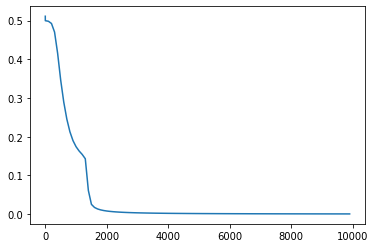

In [5]:
plt.plot(np.concatenate(([0], np.arange(1,10000,100))),losses)

### Add code to save the training losses, plot the loss

 ### Repeat the training with a NN with [2,1] architechture

### Classification Problem

In [8]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import datasets

In [7]:
# load the MNIST dataset and apply min/max scaling to scale the
# pixel intensity values to the range [0, 1] (each image is
# represented by an 8 x 8 = 64-dim feature vector)
print("loading MNIST (sample) dataset...")
digits = datasets.load_digits()
data = digits.data.astype("float")
data = (data - data.min()) / (data.max() - data.min())
print("samples: {}, dim: {}".format(data.shape[0],
data.shape[1]))
# construct the training and testing splits
(trainX, testX, trainY, testY) = train_test_split(data,
digits.target, test_size=0.25)
# convert the labels from integers to vectors
lb=LabelBinarizer()
trainY = LabelBinarizer().fit_transform(trainY)
testY = lb.fit_transform(testY)

loading MNIST (sample) dataset...
samples: 1797, dim: 64


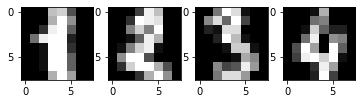

In [8]:
for i in range(1,5):
    plt.subplot(1,4,i)
    plt.imshow(np.array(data[i]).reshape(8,8),cmap='gray')

In [9]:
# train the network
print("training network...")
nn = NeuralNetwork([trainX.shape[1], 32, 16, 10])
print("{}".format(nn))
losses = nn.fit(trainX, trainY, epochs=1500)
# evaluate the network
print("evaluating network...")
predictions = nn.predict(testX,addBias=True)
predictions = predictions.argmax(axis=1)
print(classification_report(testY.argmax(axis=1), predictions))

training network...
NN architecture: 64-32-16-10
[Training: ] epoch= 1 , loss= 606.3658507398834
[Training: ] epoch= 100 , loss= 7.6207240980732935
[Training: ] epoch= 200 , loss= 3.3316662705353792
[Training: ] epoch= 300 , loss= 2.6185957041038126
[Training: ] epoch= 400 , loss= 2.401729792916964
[Training: ] epoch= 500 , loss= 2.291096098131997
[Training: ] epoch= 600 , loss= 1.9761496958635716
[Training: ] epoch= 700 , loss= 1.7180962877202943
[Training: ] epoch= 800 , loss= 1.6723836494122004
[Training: ] epoch= 900 , loss= 1.6439941958602344
[Training: ] epoch= 1000 , loss= 1.623121759595885
evaluating network...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        48
           1       0.98      1.00      0.99        53
           2       0.96      1.00      0.98        47
           3       1.00      0.94      0.97        54
           4       0.94      0.97      0.96        34
           5       1.00      0.98      0.99     

In [10]:
testY=lb.inverse_transform(testY)

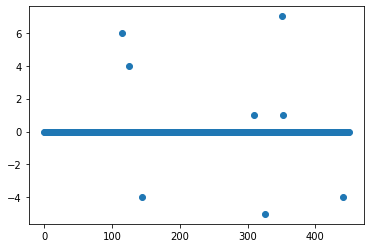

In [11]:
plt.scatter(np.arange(len(predictions)),testY-predictions)

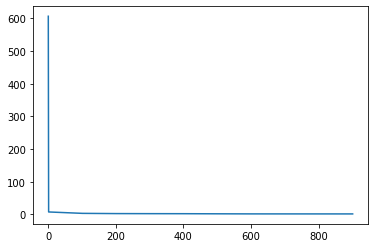

In [13]:
plt.plot(np.concatenate(([0], np.arange(1,1500,100))),losses)

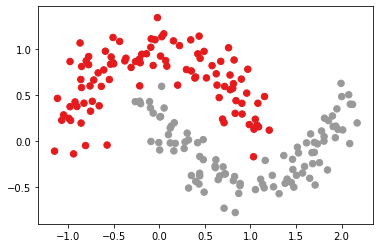

In [75]:
import sklearn.datasets
#  load a classification dataset from sklearn
X, Y = sklearn.datasets.make_moons(200, noise=0.150)
plt.scatter(X[:,0], X[:,1], s=42, c=Y, cmap=plt.cm.Set1)
y=Y.reshape(-1,1)

In [77]:
y=np.concatenate((y,np.logical_not(y).astype('int')),axis=1)
y.shape

(200, 2)

In [91]:
nn = NeuralNetwork([2, 3,2], alpha=0.01)
losses = nn.fit(X, y, epochs=10000)

[Training: ] epoch= 1 , loss= 49.78245072653032
[Training: ] epoch= 100 , loss= 22.287400381633503
[Training: ] epoch= 200 , loss= 17.96908941855546
[Training: ] epoch= 300 , loss= 17.357940962319603
[Training: ] epoch= 400 , loss= 17.23630822350612
[Training: ] epoch= 500 , loss= 17.198393058471318
[Training: ] epoch= 600 , loss= 17.17860220500721
[Training: ] epoch= 700 , loss= 17.163152158354755
[Training: ] epoch= 800 , loss= 17.14868087524761
[Training: ] epoch= 900 , loss= 17.13431374831438
[Training: ] epoch= 1000 , loss= 17.119851982642977
[Training: ] epoch= 1100 , loss= 17.10530917424139
[Training: ] epoch= 1200 , loss= 17.090775691167558
[Training: ] epoch= 1300 , loss= 17.076367576210586
[Training: ] epoch= 1400 , loss= 17.062200336072443
[Training: ] epoch= 1500 , loss= 17.048373745501536
[Training: ] epoch= 1600 , loss= 17.034964309579117
[Training: ] epoch= 1700 , loss= 17.022023540956546
[Training: ] epoch= 1800 , loss= 17.00958007166239
[Training: ] epoch= 1900 , loss=

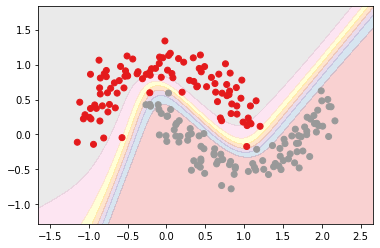

In [92]:
# Set min and max values and give it some padding
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Predict the function value for the whole gid
Z = nn.predict(np.c_[xx.ravel(), yy.ravel()],addBias=True)

# Plot the contour and training examples
plt.contourf(xx, yy, Z[:,1].reshape(xx.shape), cmap=plt.cm.Set1, alpha=0.2)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Set1)

### Regression Problem

In [93]:
X = np.random.uniform(-1, 1, size=1000)

y= np.power(X,2)+ np.random.normal(0, 1, size=X.shape[0]) * 0.2
X = X.reshape(-1,1)
y = y.reshape(-1,1)

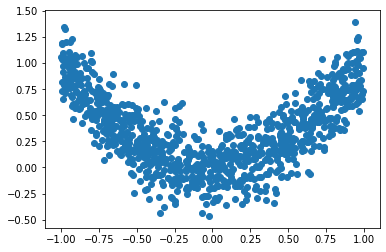

In [94]:
plt.scatter(X,y)

In [95]:
nn = NeuralNetwork([1, 6,1], alpha=0.01)
losses = nn.fit(X, y, epochs=10000)

[Training: ] epoch= 1 , loss= 62.12765318453551
[Training: ] epoch= 100 , loss= 25.110308998431787
[Training: ] epoch= 200 , loss= 20.036614914202467
[Training: ] epoch= 300 , loss= 19.482920915763188
[Training: ] epoch= 400 , loss= 19.369019733062125
[Training: ] epoch= 500 , loss= 19.33071576167738
[Training: ] epoch= 600 , loss= 19.31162267611298
[Training: ] epoch= 700 , loss= 19.29939707840289
[Training: ] epoch= 800 , loss= 19.290327721039954
[Training: ] epoch= 900 , loss= 19.282956356450136
[Training: ] epoch= 1000 , loss= 19.276602871899385
[Training: ] epoch= 1100 , loss= 19.27091644167163
[Training: ] epoch= 1200 , loss= 19.265703281857423
[Training: ] epoch= 1300 , loss= 19.26085001306437
[Training: ] epoch= 1400 , loss= 19.256286453104366
[Training: ] epoch= 1500 , loss= 19.25196653296161
[Training: ] epoch= 1600 , loss= 19.247858127571664
[Training: ] epoch= 1700 , loss= 19.243937475767375
[Training: ] epoch= 1800 , loss= 19.24018604063329
[Training: ] epoch= 1900 , loss=

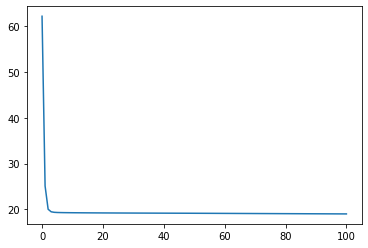

In [98]:
plt.plot(losses)

### try to play the network architechture and learning rate and see if you can improve the results

### Change the Neuralnetwrok class such that you use the momentum rule for weights update. retrain the MNIST dataset.

In [15]:
class NeuralNetwork:
    def __init__(self, layers, alpha=0.1,gamma=0.9):
    # initialize the list of weights matrices, then store the
    # network architecture and learning rate
        self.W = []
        self.V = []
        self.layers = layers
        self.alpha = alpha
        self.gamma = gamma
        # start looping from the index of the first layer but
        # stop before we reach the last two layers
        for i in np.arange(0, len(layers) - 2):
            # randomly initialize a weight matrix connecting the
            # number of nodes in each respective layer together,
            # adding an extra node for the bias + regularization(we will talk about it later)!!!
            w = np.random.randn(layers[i] + 1, layers[i + 1] + 1)
            self.W.append(w / np.sqrt(layers[i]))
            v= np.zeros((layers[i]+1, layers[i + 1] + 1))
            self.V.append(v)
        # the last two layers are a special case where the input
        # connections need a bias term but the output does not
        w = np.random.randn(layers[-2] + 1, layers[-1])
        self.W.append(w / np.sqrt(layers[-2]))
        v = np.zeros((layers[-2] + 1, layers[-1]))
        self.V.append(v)
    
    def __repr__(self):
        # construct and return a string that represents the network
        # architecture
        return "NN architecture: {}".format(
        "-".join(str(l) for l in self.layers))
    
    def sigmoid(self, x):
        # compute and return the sigmoid activation value for a
        # given input value
        return 1.0 / (1 + np.exp(-x))
    
    def sigmoid_deriv(self, x):
        # compute the derivative of the sigmoid function ASSUMING
        # that `x` has already been passed through the `sigmoid`
        # function
        return x * (1 - x)
    
    def fit(self, X, y, epochs=1000, displayUpdate=100):
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        X = np.c_[X, np.ones((X.shape[0]))]
        losses = []
        # loop over the desired number of epochs
        for epoch in np.arange(0, epochs):
            # loop over each individual data point and train
            # our network on it
            for (x, target) in zip(X, y):
                self.fit_partial(x, target)
                # check to see if we should display a training update
            if epoch == 0 or (epoch + 1) % displayUpdate == 0:
                loss = self.calculate_loss(X, y)
                print("[Training: ] epoch=", epoch+1, ", loss=",loss)
                losses.append(loss)  
        return losses
                    
    def fit_partial(self, x, y):
        # construct our list of output activations for each layer
        # as our data point flows through the network; the first
        # activation is a special case -- it's just the input
        # feature vector itself
        A = [np.atleast_2d(x)]
        # FEEDFORWARD:
        # loop over the layers in the network
        for layer in np.arange(0, len(self.W)):
            # feedforward the activation at the current layer by
            # taking the dot product between the activation and
            # the weight matrix -- this is called the "net input"
            # to the current layer
            net = A[layer].dot(self.W[layer])
            # computing the "net output" is simply applying our
            # nonlinear activation function to the net input
            out = self.sigmoid(net)
            # once we have the net output, add it to our list of
            # activations
            A.append(out)

        # BACKPROPAGATION
        # the first phase of backpropagation is to compute the
        # difference between our *prediction* (the final output
        # activation in the activations list) and the true target
        # value
        derror = A[-1] - y

        # from here, we need to apply the chain rule and build our
        # list of deltas `D`; the first entry in the deltas is
        # simply the error of the output layer times the derivative
        # of our activation function for the output value
        D = [derror * self.sigmoid_deriv(A[-1])]
        # once you understand the chain rule it becomes super easy
        # to implement with a `for` loop -- simply loop over the
        # layers in reverse order (ignoring the last two since we
        # already have taken them into account)
        for layer in np.arange(len(A) - 2, 0, -1):
            # the delta for the current layer is equal to the delta
            # of the *previous layer* dotted with the weight matrix
            # of the current layer, followed by multiplying the delta
            # by the derivative of the nonlinear activation function
            # for the activations of the current layer
            delta = D[-1].dot(self.W[layer].T)
            delta = delta * self.sigmoid_deriv(A[layer])
            D.append(delta)
        # since we looped over our layers in reverse order we need to
        # reverse the deltas
        D = D[::-1]
        # WEIGHT UPDATE PHASE
        # loop over the layers
        for layer in np.arange(0, len(self.W)):
        # update our weights by taking the dot product of the layer
        # activations with their respective deltas, then multiplying
        # this value by some small learning rate and adding to our
        # weight matrix -- this is where the actual "learnin g" takes
        # place
     
        # Vt = γV t−1 + α∇ W f (W )
        #W = W −Vt
            vt = self.gamma * self.V[layer] + self.alpha * A[layer].T.dot(D[layer])
            self.W[layer] += -vt           
    def predict(self, X,addBias=False):
        # initialize the output prediction as the input features -- this
        # value will be (forward) propagated through the network to
        # obtain the final prediction
        p = np.atleast_2d(X)
        # insert a column of 1's as the last entry in the feature
        # matrix (bias)
        if addBias:
            p = np.c_[p, np.ones((p.shape[0]))]
        # loop over our layers in the network
        for layer in np.arange(0, len(self.W)):
            # computing the output prediction is simply
            # the forward pass
            
            p = self.sigmoid(np.dot(p, self.W[layer]))
        return p
    
    def calculate_loss(self, X, targets):
        # make predictions for the input data points then compute
        # the loss
        targets = np.atleast_2d(targets)
        predictions = self.predict(X)
        loss = 0.5 * np.sum((predictions - targets) ** 2)
        return loss

In [9]:
# load the MNIST dataset and apply min/max scaling to scale the
# pixel intensity values to the range [0, 1] (each image is
# represented by an 8 x 8 = 64-dim feature vector)
print("loading MNIST (sample) dataset...")
digits = datasets.load_digits()
data = digits.data.astype("float")
data = (data - data.min()) / (data.max() - data.min())
print("samples: {}, dim: {}".format(data.shape[0],
data.shape[1]))
# construct the training and testing splits
(trainX, testX, trainY, testY) = train_test_split(data,
digits.target, test_size=0.25)
# convert the labels from integers to vectors
lb=LabelBinarizer()
trainY = LabelBinarizer().fit_transform(trainY)
testY = lb.fit_transform(testY)

loading MNIST (sample) dataset...
samples: 1797, dim: 64


In [16]:
# train the network
print("training network...")
nn = NeuralNetwork([trainX.shape[1], 32, 16, 10])
print("{}".format(nn))
losses = nn.fit(trainX, trainY, epochs=1500)
# evaluate the network
print("evaluating network...")
predictions = nn.predict(testX,addBias=True)
predictions = predictions.argmax(axis=1)
print(classification_report(testY.argmax(axis=1), predictions))

training network...
NN architecture: 64-32-16-10
[Training: ] epoch= 1 , loss= 606.9010377680622
[Training: ] epoch= 100 , loss= 9.074087231233072
[Training: ] epoch= 200 , loss= 3.171997267037166
[Training: ] epoch= 300 , loss= 2.1384437624117507
[Training: ] epoch= 400 , loss= 0.8356551967067583
[Training: ] epoch= 500 , loss= 0.3350125455892138
[Training: ] epoch= 600 , loss= 0.24052885456569428
[Training: ] epoch= 700 , loss= 0.18972503719884237
[Training: ] epoch= 800 , loss= 0.15691775678546327
[Training: ] epoch= 900 , loss= 0.13377800912293225
[Training: ] epoch= 1000 , loss= 0.11653109650285945
[Training: ] epoch= 1100 , loss= 0.10316733815465964
[Training: ] epoch= 1200 , loss= 0.0925055912632678
[Training: ] epoch= 1300 , loss= 0.08380229131030692
[Training: ] epoch= 1400 , loss= 0.07656466660510566
[Training: ] epoch= 1500 , loss= 0.07045273383674377
evaluating network...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     

### How did the training go? are the losses smaller is the accuracy the same? what does it mean?

losses became smaller faster (faster convergence)
although the accuracy is the same it means are confidence on the classification increases.

